In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

from crop_cars_utility import *
%matplotlib inline

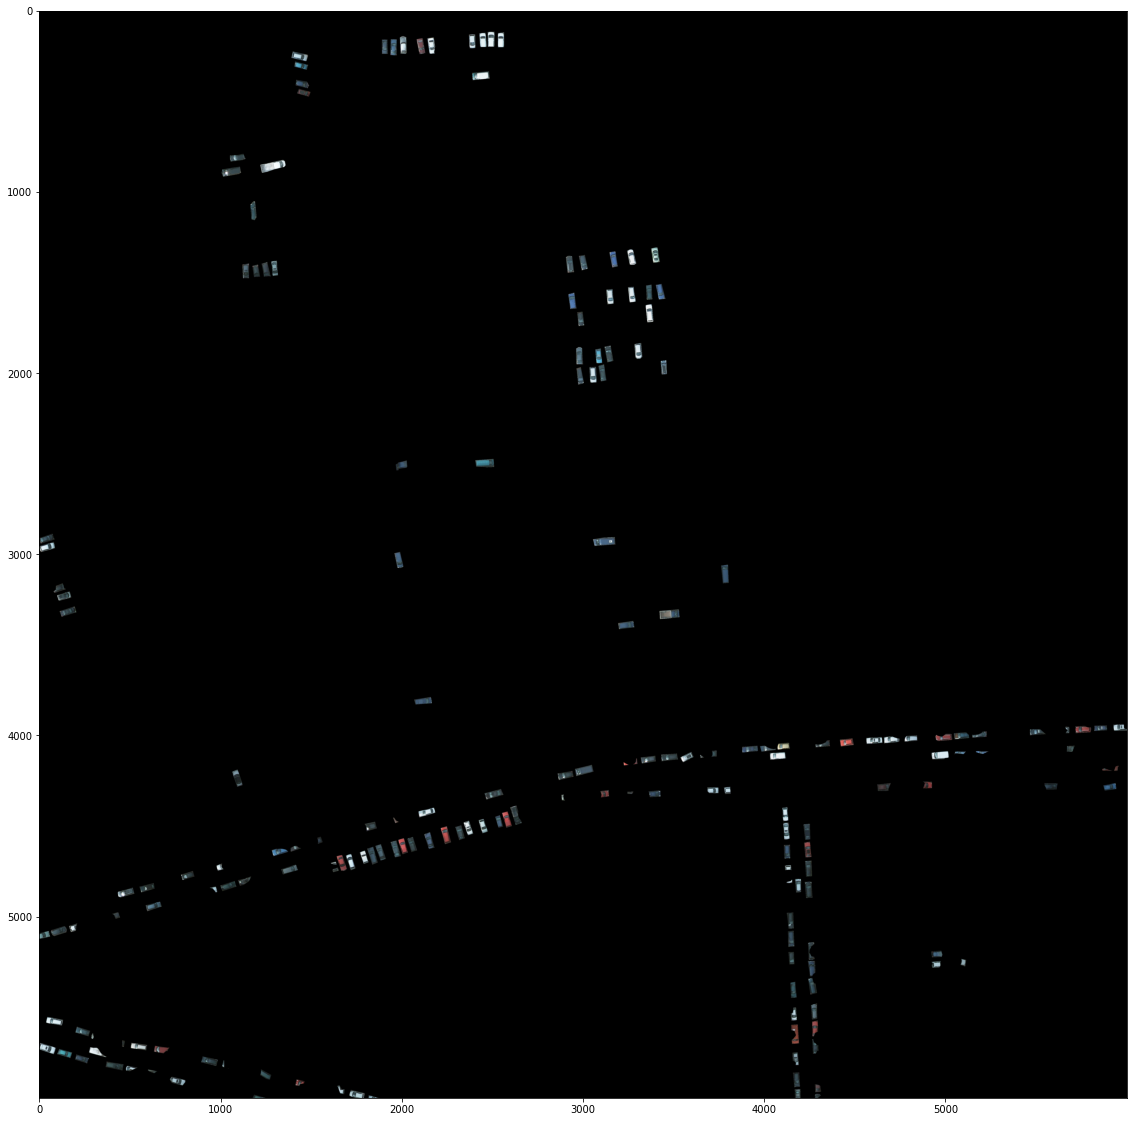

In [2]:
mask = load_images_cv('../../potsdam_data/training/top_potsdam_6_8_label.tif', True)
img = load_images_cv('../../potsdam_data/training/top_potsdam_6_8_RGB.tif', False)
img_filtered = img * mask[:, :, None]
plt.figure(figsize=(20, 20))
plt.imshow(img_filtered)

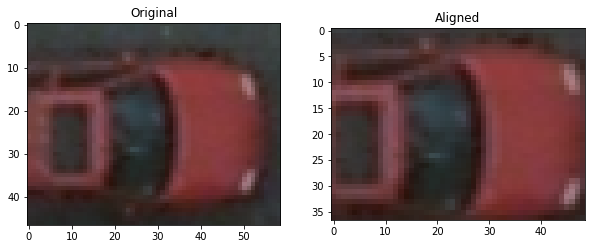

In [4]:
coords = load_cars_bbox_potsdam('../../potsdam_data/training/top_potsdam_6_8_annos.json')
x = coords[100]
buffer = 5

car_original, car_aligned = crop_car(img, img_filtered, x, buffer)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(car_original)

plt.subplot(1, 2, 2)
plt.title("Aligned")
plt.imshow(car_aligned)

In [5]:
data_path = "../../potsdam_data/training"
potsdam_cars_succeed, potsdam_cars_failed = return_potsdam_cars(data_path, area_threshold = 0.88)

# succeed cars
if potsdam_cars_succeed:
    cars_path = os.path.join(os.path.split(data_path)[0], "potsdam_cars")
    save_cars(potsdam_cars_succeed, cars_path)

# failed cars
if potsdam_cars_failed:
    cars_path = os.path.join(os.path.split(data_path)[
                             0], "potsdam_cars_failed")
    save_cars(potsdam_cars_failed, cars_path)

::Reading RBG => ../../potsdam_data/training/top_potsdam_6_8_RGB.tif
::Reading Label => ../../potsdam_data/training/top_potsdam_6_8_label.tif
::Reading Annotation => ../../potsdam_data/training/top_potsdam_6_8_annos.json
::Total number of unique cars => 191


/home/hca/Documents/Master/Thesis/Master-Thesis/preprocessing/crop_cars_utility.py:101: RuntimeWarning: invalid value encountered in true_divide
  vec /= np.linalg.norm(vec)


--------------------------------------------------
::Reading RBG => ../../potsdam_data/training/top_potsdam_6_10_RGB.tif
::Reading Label => ../../potsdam_data/training/top_potsdam_6_10_label.tif
::Reading Annotation => ../../potsdam_data/training/top_potsdam_6_10_annos.json
::Total number of unique cars => 275
--------------------------------------------------
::Reading RBG => ../../potsdam_data/training/top_potsdam_3_11_RGB.tif
::Reading Label => ../../potsdam_data/training/top_potsdam_3_11_label.tif
::Reading Annotation => ../../potsdam_data/training/top_potsdam_3_11_annos.json
::Total number of unique cars => 167
--------------------------------------------------
::Reading RBG => ../../potsdam_data/training/top_potsdam_7_11_RGB.tif
::Reading Label => ../../potsdam_data/training/top_potsdam_7_11_label.tif
::Reading Annotation => ../../potsdam_data/training/top_potsdam_7_11_annos.json
::Total number of unique cars => 346
--------------------------------------------------
::Reading RBG

In [88]:
area_treshold = 0.88
min_height=20
ratio_threshold=2
carrs = []
for car_aligned in potsdam_cars_failed: 
    r, c, _ = car_aligned.shape
    car_area = np.sum((car_aligned[:, :, 0] != 0) &
                      (car_aligned[:, :, 1] != 0) &
                      (car_aligned[:, :, 2] != 0))
    background_area = r*c
    
    if (r < min_height) or (r == 0 or c == 0) or (c < ratio_threshold*r):
        continue
    if car_area / background_area >= area_treshold:
        carrs.append(car_aligned)
save_cars(carrs, "test")
len(carrs)

463

In [ ]:
json_path = "../data/cem-v0/vehicles_600_carssmalltrucks_outside_bnr10-bnf-defo0.05/annotations.json"
artificial_cars_succeed, artificial_cars_failed = return_artificial_cars(
    json_path, buffer=0, min_height=20, area_threshold=0, ratio_threshold=1)

# succeed cars
if artificial_cars_succeed:
    cars_path = "../data/artificial_cars"
    save_cars(artificial_cars_succeed, cars_path)

# failed cars
if artificial_cars_failed:
    cars_path = "../data/artificial_failed"
    save_cars(artificial_cars_failed, cars_path)